In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Global YouTube Statistics.csv", encoding="ISO-8859-1")  # or encoding="latin1"
print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           IN  ...                   

In [ ]:
bool_series = pd.isnull(df)
missing_values_count = bool_series.sum()
print(missing_values_count)

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

In [ ]:
from sklearn.impute import SimpleImputer
numimputer = SimpleImputer(missing_values=np.nan,strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent') #make 2 types of imputers for numeric and non numeric
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns #how to differentiate numeric and non numeric col
df[num_cols] = numimputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])#apply

In [ ]:
drop_col=['Abbreviation','Title','country_rank']
df.drop(columns=drop_col,inplace=True)

In [ ]:
#df = pd.get_dummies(df, columns=['category', 'channel_type', 'Country'], drop_first=True)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Country of origin'] = le.fit_transform(df['Country of origin'])

In [ ]:
df.to_csv("cleaneddata.csv", index=False)

1.	What are the top 10 YouTube channels based on the number of subscribers?

In [ ]:
a=df.sort_values(by='subscribers',ascending=False).head(10)
print(a[['rank','Youtuber','subscribers']])

   rank                    Youtuber  subscribers
0   1.0                    T-Series  245000000.0
1   2.0              YouTube Movies  170000000.0
2   3.0                     MrBeast  166000000.0
3   4.0  Cocomelon - Nursery Rhymes  162000000.0
4   5.0                   SET India  159000000.0
5   6.0                       Music  119000000.0
6   7.0         ýýý Kids Diana Show  112000000.0
7   8.0                   PewDiePie  111000000.0
8   9.0                 Like Nastya  106000000.0
9  10.0               Vlad and Niki   98900000.0


2.	Which category has the highest average number of subscribers?

In [ ]:
avg = df.groupby('category')['subscribers'].mean()#grps rows acc to cat and finds avg of subscribers in each cat
avg.max()#finds highest no.
print("category ",avg.idxmax()," has the highest avg no of subscribers")#prints label

category  Shows  has the highest avg no of subscribers


3.	How many videos, on average, are uploaded by YouTube channels in each category?

In [ ]:
x = df.groupby('category')['uploads'].mean()
print(x)

category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment              9938.399317
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


4.	What are the top 5 countries with the highest number of YouTube channels?

In [ ]:
y = df.groupby('Country')['Youtuber'].count().sort_values(ascending=False)
print(y.head())

Country
United States     440
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: Youtuber, dtype: int64


5.	What is the distribution of channel types across different categories?

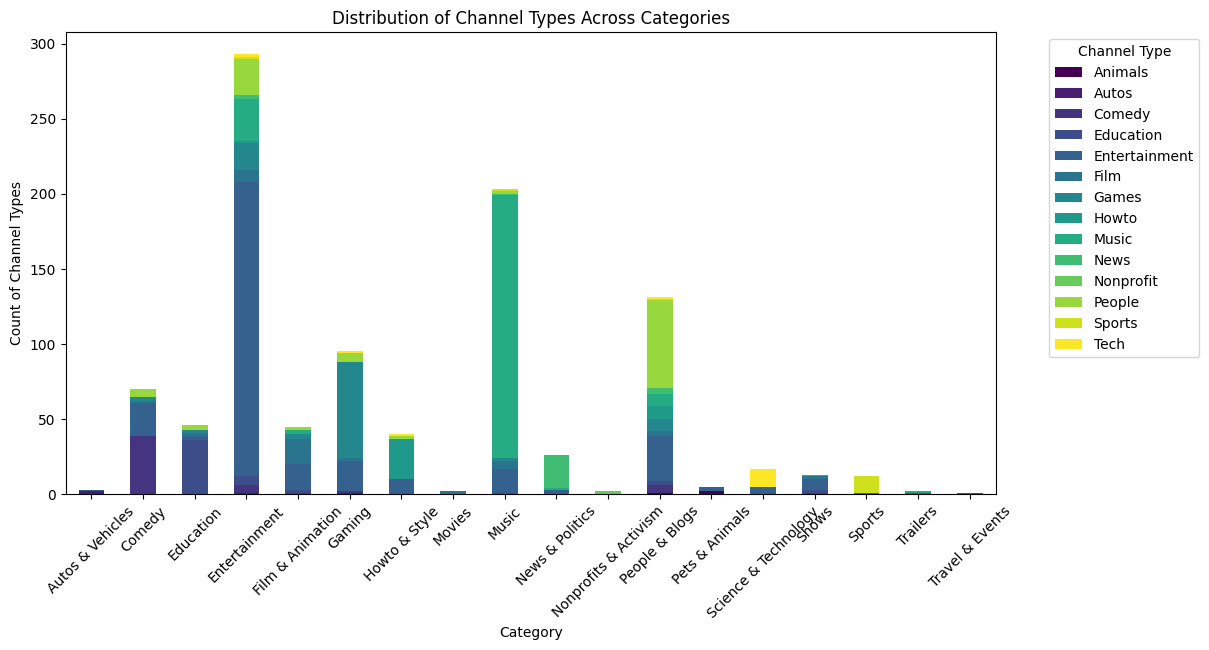

In [ ]:
cat_counts = df.groupby('category')['channel_type'].value_counts().unstack() #counting occurence of each unique channel type within the categories// unstack - table
cat_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel("Category")
plt.ylabel("Count of Channel Types")
plt.title("Distribution of Channel Types Across Categories")
plt.legend(title="Channel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

6.	Is there a correlation between the number of subscribers and total video views for YouTube channels?

0.7480316535516518


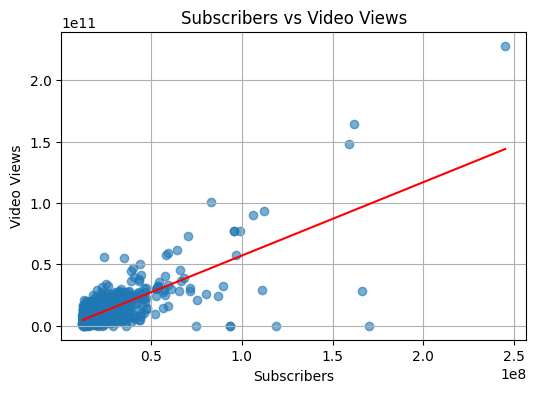

In [ ]:
plt.figure(figsize=(6, 4))
x = df['subscribers']
y = df['video views']
plt.scatter(df['subscribers'], df['video views'], alpha=0.6)
m, b = np.polyfit(x.dropna(), y.loc[y.dropna().index], 1)  # Drop NaN values to prevent errors
plt.plot(x, m*x + b, color='red', label="Trendline")
plt.title('Subscribers vs Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.grid(True)
print(x.corr(y))
plt.show()

As seen from correlation line there is a positive correlation between subscribers and video views.

7.	How do the monthly earnings vary throughout different categories?

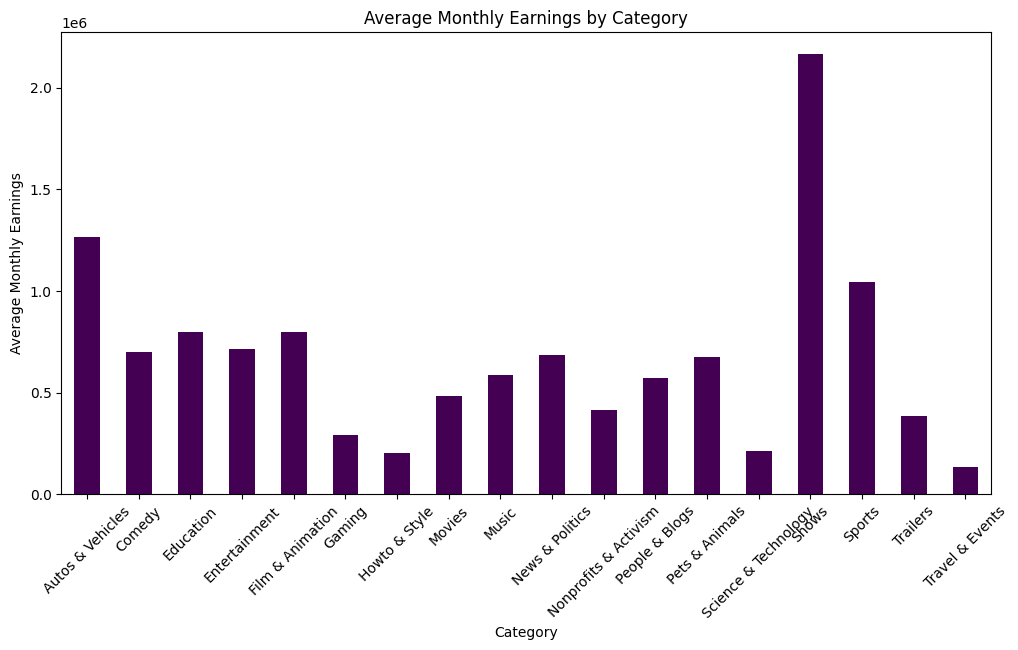

In [ ]:
df['total_monthly_earnings'] = df['highest_monthly_earnings'] + df['lowest_monthly_earnings']

df.groupby('category')['total_monthly_earnings'].mean().plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.xlabel('Category')
plt.ylabel('Average Monthly Earnings')
plt.title('Average Monthly Earnings by Category')
plt.xticks(rotation=45)
plt.show()


The category 'shows' has the highest average monthly earnings, followed by autos & vehicles and sports. The lowest earning categories were travel & events followed by how to & style and pets & animals.

8.	What is the overall trend in subscribers gained in the last 30 days across all channels?

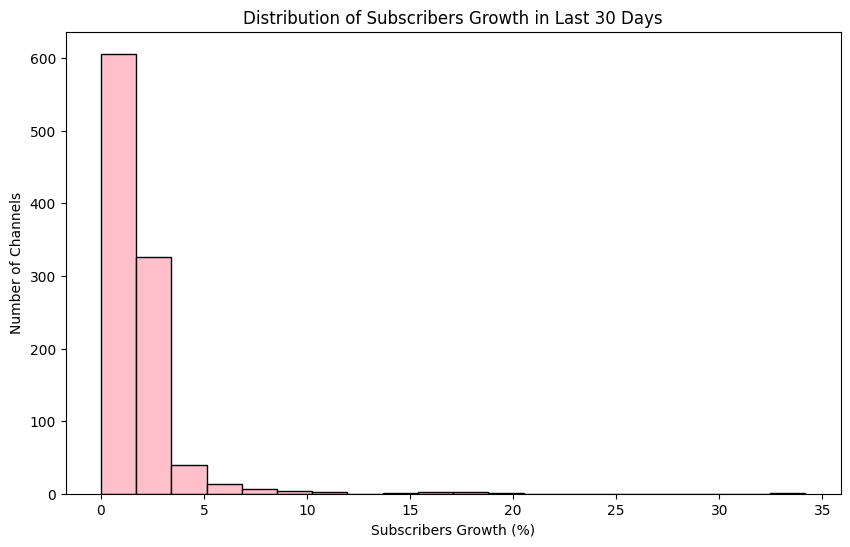

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentage gain
df['subscribers_growth_percentage'] = (df['subscribers_for_last_30_days'] / df['subscribers']) * 100

# Plot as a histogram to see the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['subscribers_growth_percentage'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Subscribers Growth (%)')
plt.ylabel('Number of Channels')
plt.title('Distribution of Subscribers Growth in Last 30 Days')
plt.show()


the growth was around 0-5% for most of the channels with very few experiencing more than 5% growth in last 30 days

9.	Are there any outliers in terms of yearly earnings from YouTube channels?

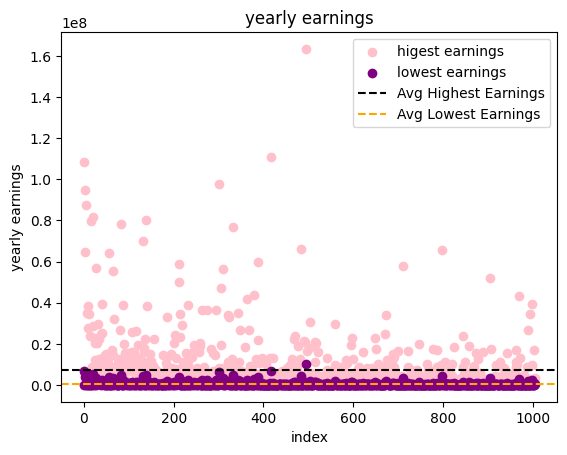

In [ ]:
y=df['highest_yearly_earnings']
z=df['lowest_yearly_earnings']
x=df.index
plt.scatter(x,y,label='higest earnings',color='pink')
plt.scatter(x,z,label='lowest earnings',color='purple')
avg_high = y.mean()
avg_low = z.mean()
plt.axhline(avg_high, color='black', linestyle='--', label='Avg Highest Earnings')
plt.axhline(avg_low, color='orange', linestyle='--', label='Avg Lowest Earnings')
plt.legend()
plt.title('yearly earnings')
plt.xlabel('index')
plt.ylabel('yearly earnings')
plt.show()

yes there are outliers, especially with respect to the highest earnings.

10.	What is the distribution of channel creation dates? Is there any trend over time?

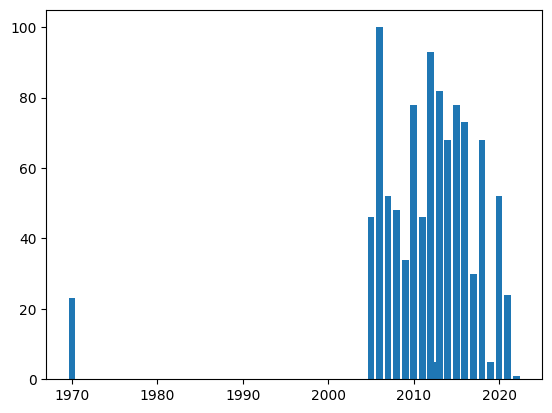

In [ ]:
x=df['created_year'].unique()
y=df['created_year'].value_counts()
plt.bar(x,y)
plt.show()

Over time more channels were created but that slowed down around 2020 presumably because of the pandemic

11.	Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?

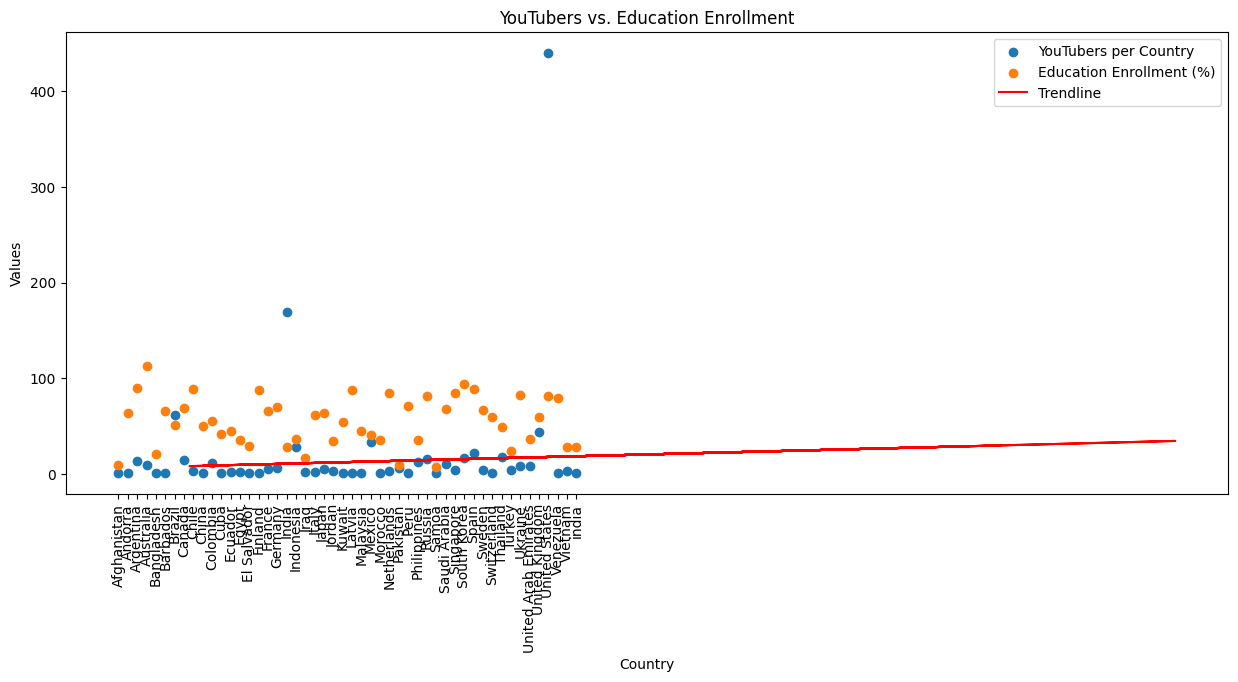

In [ ]:
z=df.groupby('Country')['Youtuber'].count() #counts the no.of youtubers in a country
y=df.groupby('Country')['Gross tertiary education enrollment (%)'].mean()
x=z.index
y = y.reindex(x)  # Align y to match x indices
plt.figure(figsize=(15, 6))
# Scatter plot
plt.scatter(x, z, label='YouTubers per Country')
plt.scatter(x, y, label='Education Enrollment (%)')

# Fit trendline (linear regression)
m, b = np.polyfit(y.dropna(), z.loc[y.dropna().index], 1)  # Drop NaN values to prevent errors
plt.plot(y, m*y + b, color='red', label="Trendline")

plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Values")
plt.title("YouTubers vs. Education Enrollment")
plt.legend()
plt.show()

As u can see there's a slight positive correlation

12.	How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?

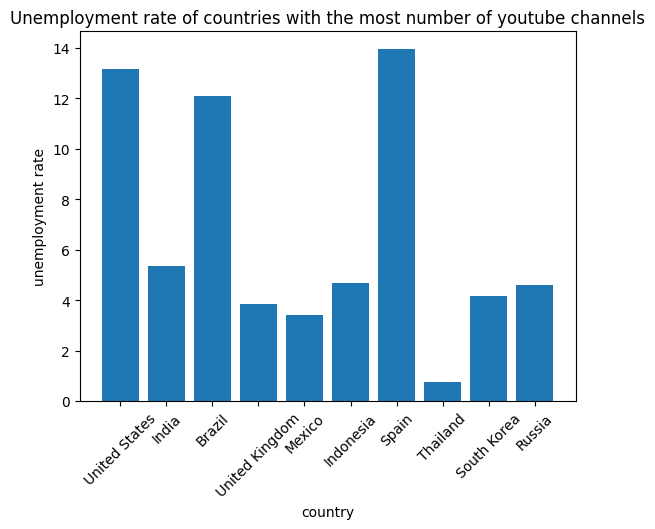

In [ ]:
x=df.groupby('Country')['Youtuber'].count().sort_values(ascending=False);
x.head(10) #series so country name is index
y=df.groupby('Country')['Unemployment rate'].mean()
unemp=[]
for c in x.head(10).index:
  if(c in y.index):
    unemp.append(float(y[c]))
plt.bar(x.head(10).index,unemp)
plt.xticks(rotation=45)
plt.xlabel("country")
plt.ylabel("unemployment rate")
plt.title("Unemployment rate of countries with the most number of youtube channels")
plt.show()

13.	What is the average urban population percentage in countries with YouTube channels?

In [ ]:
x=df.groupby('Country')['Urban_population'].mean()
sum=0
for c in x.items():
  sum+=c[1]
print("average is", sum/len(x))

average is 80576534.5924344


14.	Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?

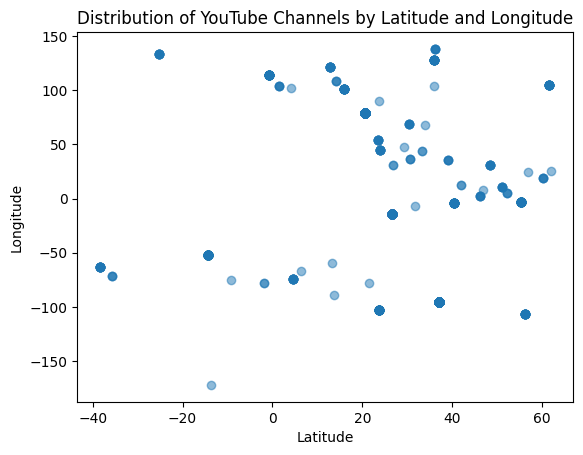

The density is concentrated around North America,Europe and Asia 


In [ ]:
plt.scatter(df['Latitude'], df['Longitude'], alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Distribution of YouTube Channels by Latitude and Longitude')
plt.show()
print("The density is concentrated around North America,Europe and Asia ")

15.	What is the correlation between the number of subscribers and the population of a country?

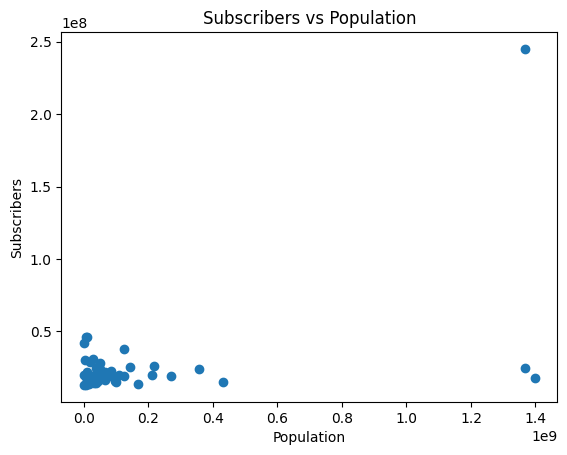

correlation :  0.5105139711803777
There is a slight positive correlation


In [ ]:
y=df.groupby("Country")['subscribers'].mean()
x=df.groupby('Country')['Population'].mean()
plt.xlabel('Population')
plt.ylabel("Subscribers")
plt.title("Subscribers vs Population")
plt.scatter(x,y)
plt.show()
print("correlation : ",x.corr(y))
print("There is a slight positive correlation")

16.	How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population?

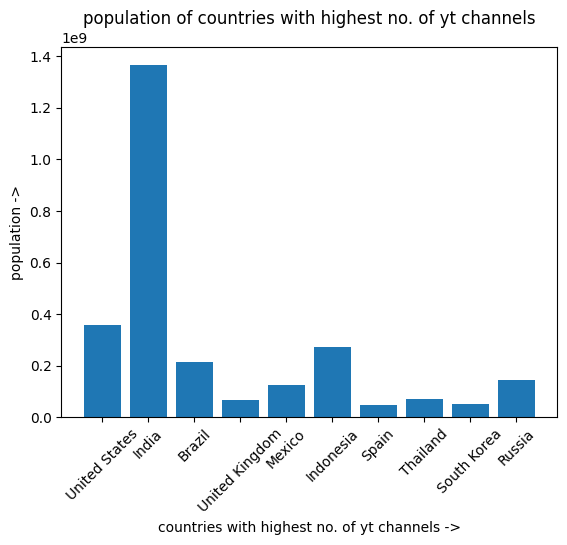

In [ ]:
x=df.groupby('Country')['Youtuber'].count().sort_values(ascending=False).head(10).index
y=df.groupby('Country')['Population'].mean()
totp=[]
for c in x:
  if c in y.index:
    totp.append(y[c])
plt.bar(x,totp)
plt.xlabel("countries with highest no. of yt channels ->")
plt.ylabel("population ->")
plt.title("population of countries with highest no. of yt channels")
plt.xticks(rotation=45)
plt.show()

17.	Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?

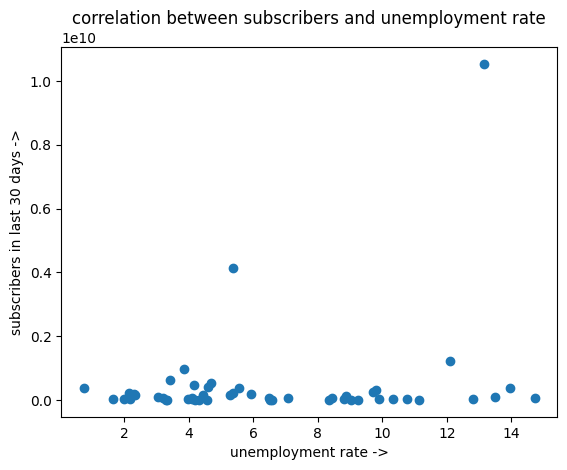

correlation :  0.2253979116964877
there is a slight positive correlation


In [ ]:
y=df.groupby('Country')['subscribers'].sum()
x=df.groupby('Country')['Unemployment rate'].mean()
plt.scatter(x,y)
plt.ylabel("subscribers in last 30 days ->")
plt.xlabel("unemployment rate ->")
plt.title("correlation between subscribers and unemployment rate")
plt.show()
print("correlation : ",x.corr(y))
print("there is a slight positive correlation")

18.	How does the distribution of video views for the last 30 days vary across different channel types?

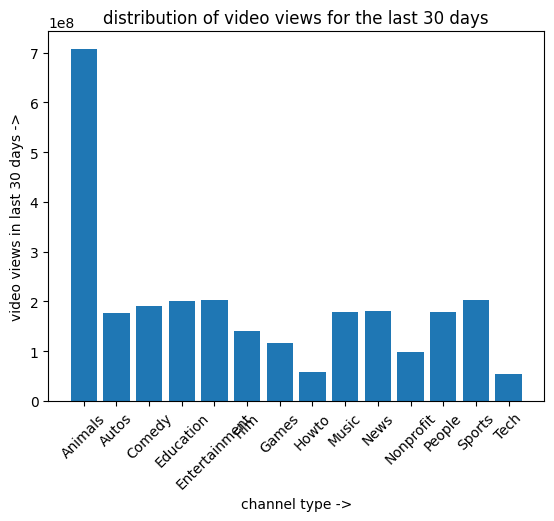

The category animals has the highest average video views


In [ ]:
x=df.groupby('channel_type')['video_views_for_the_last_30_days'].mean()
plt.bar(x.index,x)
plt.xticks(rotation=45)
plt.xlabel("channel type ->")
plt.ylabel("video views in last 30 days ->")
plt.title("distribution of video views for the last 30 days")
plt.show()
print("The category animals has the highest average video views")

19.	Are there any seasonal trends in the number of videos uploaded by YouTube channels?

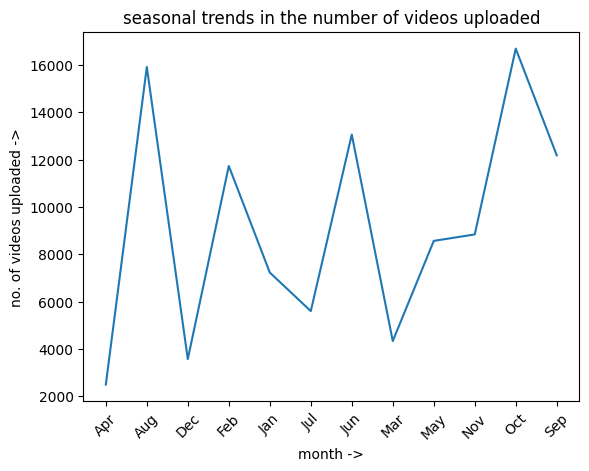

youtube channels created during the months of aug and oct has most number of videos uploaded
hard to find seasonal trends as the upload date for the videos is not given


In [ ]:
x=df.groupby('created_month')['uploads'].mean()
s=x.to_dict()
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["created_month"] = pd.Categorical(df["created_month"], categories=month_order, ordered=True)
sorted_df = df.sort_values("created_month")
plt.plot(x.index,x)
plt.xticks(rotation=45)
plt.xlabel("month ->")
plt.ylabel("no. of videos uploaded ->")
plt.title("seasonal trends in the number of videos uploaded")
plt.show()
print("youtube channels created during the months of aug and oct has most number of videos uploaded")
print("hard to find seasonal trends as the upload date for the videos is not given")

20.	What is the average number of subscribers gained per month since the creation of YouTube channels till now?

In [ ]:
df["year_diff"]=2024-df['created_year']
#below code was used to convert month col to numeric
#df['created_month'] = pd.to_datetime(df['created_month'], format='%b').dt.month

#cal no. of months
df["diff_m"]=12*df['year_diff']+df['created_month']

#calculating sum of all rows
sum_m=df["diff_m"].sum()

#calculating sum of total number of subscribers for all channels
sum=df["subscribers"].sum()

avg=sum/sum_m
print("the average number of subscribers gained per month is ",avg)


the average number of subscribers gained per month is  162137.3102068181
